Project 1: IMDB Movies Dataset: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

In [20]:
# Importing necessary libraries (for all questions)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [28]:
# Question 1: Exploring the Dataset
# Load the dataset
file_path = r"C:\Users\Sanu\Downloads\movies dataset\imdb_top_1000.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

# Check the data types and structure of the dataset
data.info()

# Basic statistics of numerical columns
data.describe()

# Checking for missing values
print("Missing values:")
print(data.isnull().sum())

# Cleaning the data (filling or dropping missing values)
data['Gross'] = data['Gross'].str.replace(',', '').astype(float)  # Convert Gross to numeric
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')  # Fix Released_Year

# Fill missing values in "Meta_score" with the mean value
data['Meta_score'].fillna(data['Meta_score'].mean(), inplace=True)

# Drop rows with missing values for simplicity
data.dropna(inplace=True)

# Check the cleaned dataset
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
Missing values:
Poster_Link        0


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


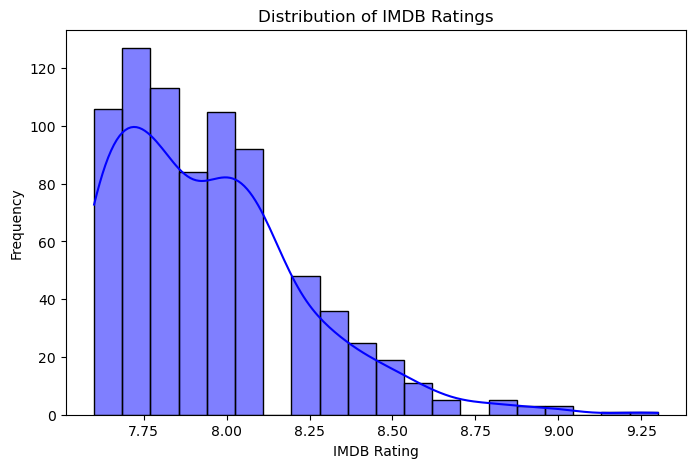

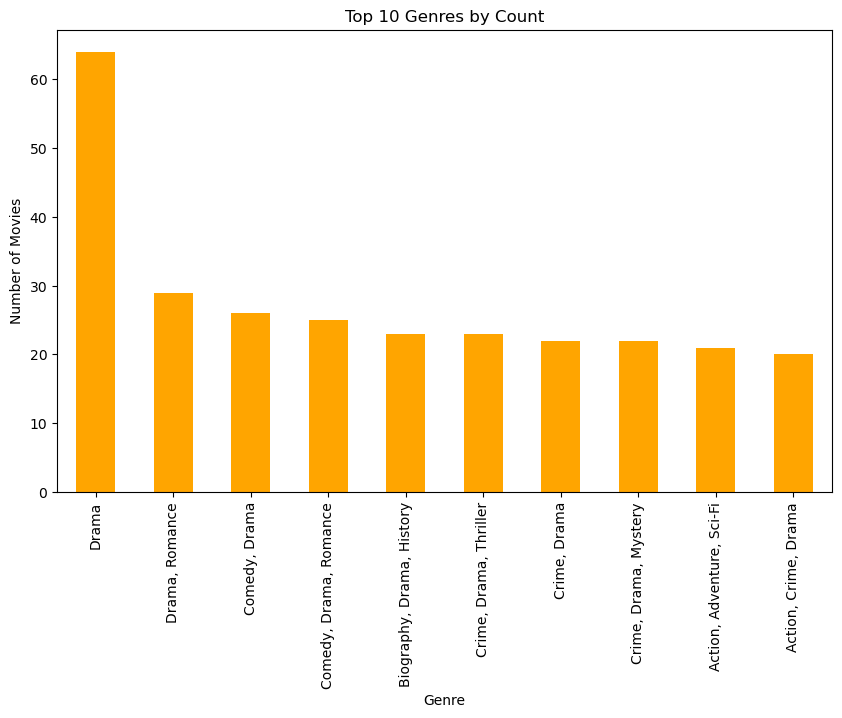

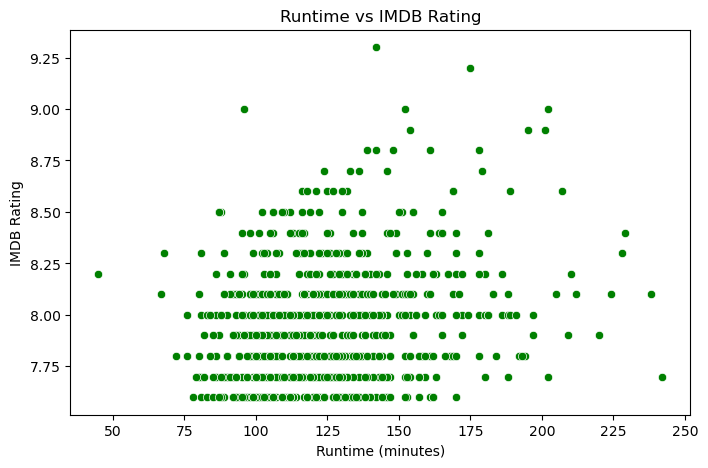

In [29]:
# Question 2: Visualizing the Data
# Plotting the distribution of IMDB Ratings
plt.figure(figsize=(8, 5))
sns.histplot(data['IMDB_Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.show()

# Visualize the number of movies by Genre
plt.figure(figsize=(10, 6))
data['Genre'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Genres by Count')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

# Scatterplot of Runtime vs IMDB Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Runtime'].str.replace(' min', '').astype(int), y=data['IMDB_Rating'], color='green')
plt.title('Runtime vs IMDB Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDB Rating')
plt.show()



In [27]:
# Question 3: Using Machine Learning Models
# Preprocessing for machine learning
le = LabelEncoder()
data['Genre_encoded'] = le.fit_transform(data['Genre'])
X = data[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Genre_encoded']]
y = data['Gross']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
print("Linear Regression R^2 Score:", r2_score(y_test, lr_preds))

# Random Forest 
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("Random Forest R^2 Score:", r2_score(y_test, rf_preds))

# Decision Tree 
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
print("Decision Tree R^2 Score:", r2_score(y_test, dt_preds))

# Support Vector Regressor
svr = SVR()
svr.fit(X_train, y_train)
svr_preds = svr.predict(X_test)
print("Support Vector Regressor R^2 Score:", r2_score(y_test, svr_preds))

# Polynomial Regression (using pipeline for simplicity)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
poly_preds = poly_model.predict(X_test)
print("Polynomial Regression R^2 Score:", r2_score(y_test, poly_preds))


Linear Regression R^2 Score: 0.4382764356013584
Random Forest R^2 Score: 0.5018985064729431
Decision Tree R^2 Score: 0.4203297213620927
Support Vector Regressor R^2 Score: -0.14321909221441853
Polynomial Regression R^2 Score: 0.504076231249956


Finally, summarizing the outcomes of the project explaining the steps taken in data exploration, visualization, and model implementation. After the detail analysis, I noted that Random Forest performed the best in terms of R-squared score, making it the most effective model for predicting movie gross income in this dataset. Also I highlighted key insights from our visualizations and emphasized the importance of data cleaning and preprocessing in achieving reliable results. 
The goal of this project was to analyze the IMDb dataset of the top 1000 movies and TV shows.
1. Data Exploration: I did data exploration by cleaning the dataset, by handling missing values and, converting certain columns like Gross and Released_Year. I also explored data types and basic statistics.
2. Data Visualization: I visualized data by plotting IMDB Rating distributions, Genre counts, and relationships between Runtime and IMDB Ratings.
3. Machine Learning Models: For the Machine Learning Models, I used Linear Regression, Random Forest, Decision Tree, Support Vector Regression, and Polynomial Regression.
Out of all, Random Forest performed the best with a higher R^2 score. Whereas, linear Regression and Polynomial Regression provided simpler models but had lower performance. In conclusion, Random Forest was the most effective predictive model for estimating movie gross income.
